In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

model_data = pd.read_csv('cleaned_data.csv')
model_data

,price,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,...,balcony,yard,terrace,parking,has_internet,has_security_door,has_video_surveillance,has_storage,has_advance_payment,description_header_is_all_caps
0,750.0,2.0,42.1,1807.0,4.0,NaN,NaN,NaN,1.0,3.0,...,False,False,False,False,True,True,False,False,False,True
1,595.0,3.0,58.7,2005.0,3.0,NaN,2.0,NaN,3.0,5.0,...,True,False,False,True,True,True,False,False,True,False
2,670.0,2.0,72.0,NaN,4.0,NaN,1.0,NaN,4.0,4.0,...,True,True,False,True,True,True,False,True,False,NaN
3,550.0,1.0,24.0,2023.0,5.0,7.0,1.0,550.0,3.0,4.0,...,False,False,False,True,False,False,False,True,False,False
4,800.0,2.0,48.1,2020.0,3.0,NaN,1.0,NaN,1.0,4.0,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,540.0,2.0,41.9,2018.0,5.0,NaN,1.0,NaN,1.0,1.0,...,False,False,False,True,True,False,False,False,True,NaN
1866,790.0,2.0,45.8,2022.0,5.0,7.0,1.0,NaN,2.0,4.0,...,True,False,False,False,False,True,False,True,False,True
1867,459.0,1.0,21.0,2019.0,5.0,NaN,NaN,NaN,6.0,8.0,...,False,False,False,False,True,True,True,True,False,False
1868,500.0,1.0,32.9,1994.0,5.0,4.0,1.0,500.0,7.0,9.0,...,True,False,False,True,True,True,True,False,False,True


In [2]:
import seaborn as sns

model_data = pd.get_dummies(model_data, columns=['mun_or_city']) 
model_data
X = model_data.drop(columns=['price'])
y = model_data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

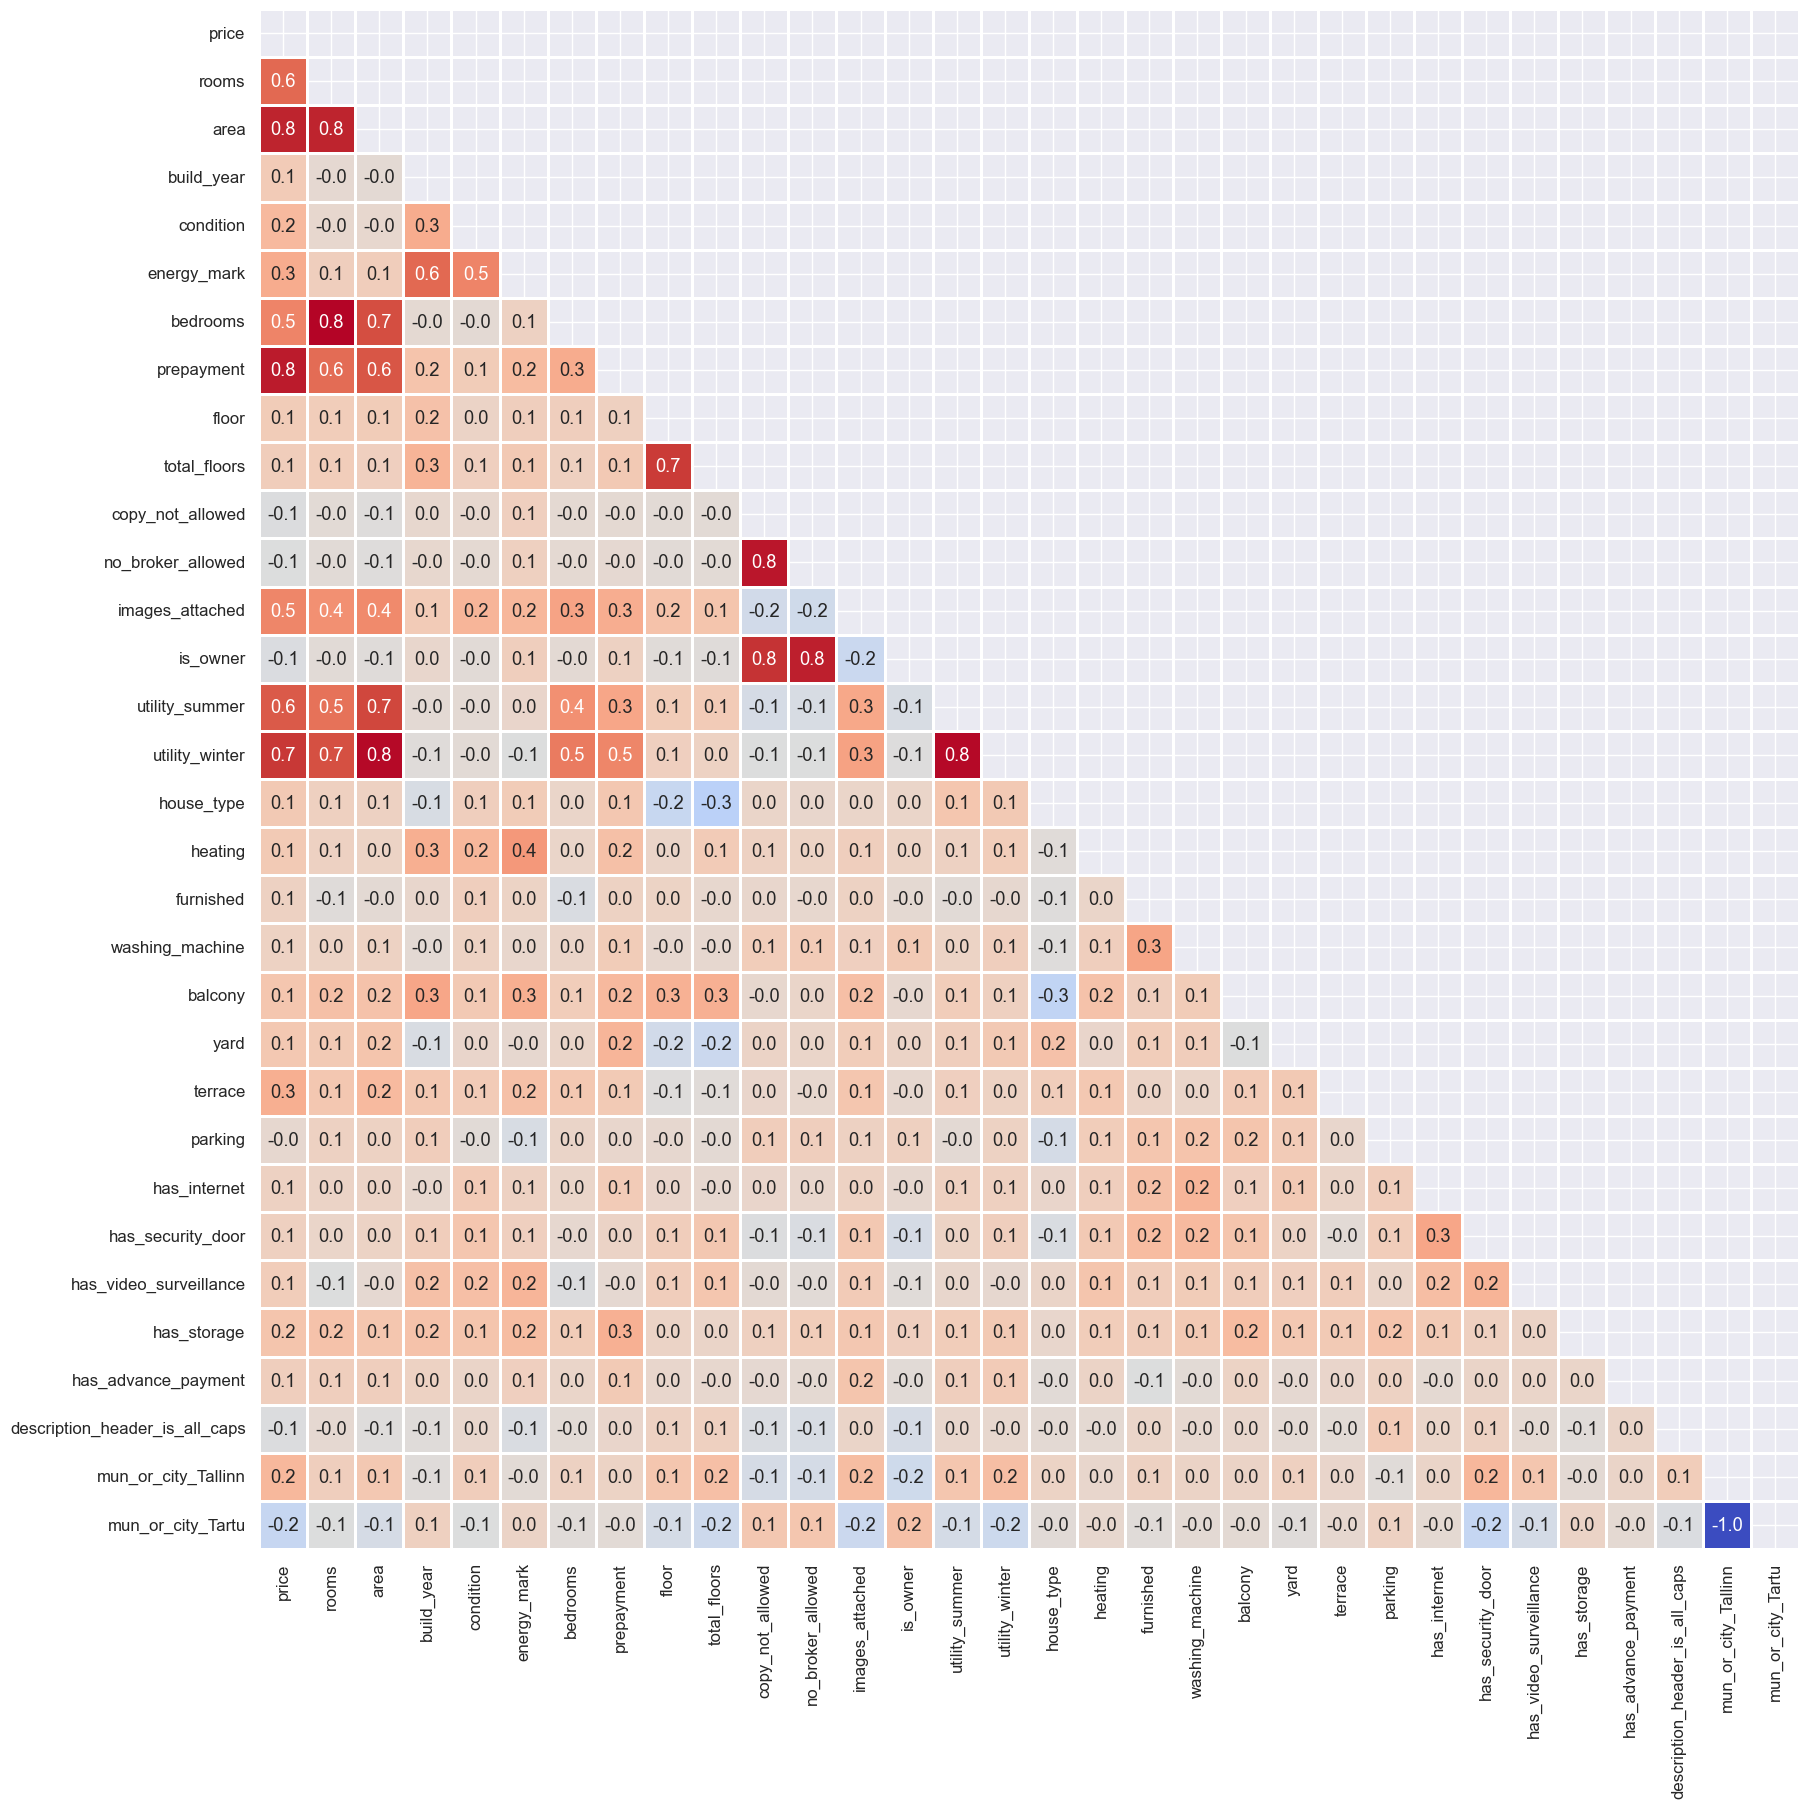

In [3]:
sns.set(font_scale=1.1)
correlation_train = model_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [4]:
X_train.describe()

,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,images_attached,utility_summer,utility_winter,house_type,heating
count,1397.000000,1402.000000,1104.000000,1284.000000,709.000000,1003.000000,257.000000,1305.000000,1305.000000,1401.000000,464.000000,464.000000,1055.000000,1196.000000
mean,2.075161,50.924679,1983.473732,3.713396,5.595205,1.455633,529.267315,3.170881,5.165517,19.729479,92.452586,170.743534,1.806635,7.169732
std,0.890538,27.523834,45.653085,0.971347,1.547197,0.673697,182.740318,2.212779,3.051482,9.689998,49.285192,96.050568,0.438379,1.646740
min,1.000000,8.500000,1347.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,2.000000,17.000000,17.000000,1.000000,2.000000
25%,1.000000,33.000000,1961.750000,3.000000,4.000000,1.000000,400.000000,2.000000,3.000000,13.000000,60.000000,110.000000,2.000000,7.000000
50%,2.000000,46.900000,1989.000000,4.000000,6.000000,1.000000,500.000000,3.000000,5.000000,18.000000,80.000000,150.000000,2.000000,7.000000
75%,3.000000,61.600000,2018.000000,5.000000,7.000000,2.000000,650.000000,4.000000,6.000000,25.000000,110.000000,200.000000,2.000000,9.000000
max,6.000000,265.000000,2024.000000,5.000000,8.000000,5.000000,990.000000,24.000000,30.000000,68.000000,500.000000,1000.000000,3.000000,11.000000


In [5]:
# not a perfect solution, but let's fill all possible NaN-values with mean values (after splitting, of course!)
columns = ['rooms', 'build_year', 'condition', 'energy_mark', 'bedrooms', 'prepayment', 'floor', 'total_floors',
           'utility_summer', 'utility_winter', 'house_type', 'heating']
# images attached replace with 0
for column in columns:
    X_train[column] = X_train[column].fillna(X_train[column].mean())
    X_test[column] = X_test[column].fillna(X_test[column].mean())

# if images attached is NaN, it's probably 0
X_train.images_attached = X_train.images_attached.fillna(0)
X_test.images_attached = X_test.images_attached.fillna(0)

# it's more likely that there would be an advance payment that's not clearly disclosed
X_train.has_advance_payment = X_train.has_advance_payment.fillna(True)
X_test.has_advance_payment = X_test.has_advance_payment.fillna(True)

# if it's NaN, it probably doesn't exist, therefore isn't in caps
X_train.description_header_is_all_caps = X_train.images_attached.fillna(False)
X_test.description_header_is_all_caps = X_test.images_attached.fillna(False)

C:\Users\rt\AppData\Local\Temp\ipykernel_2852\1033805883.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.has_advance_payment = X_train.has_advance_payment.fillna(True)
C:\Users\rt\AppData\Local\Temp\ipykernel_2852\1033805883.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.has_advance_payment = X_test.has_advance_payment.fillna(True)


In [6]:
X_train.isna().sum()

rooms                             0
area                              0
build_year                        0
condition                         0
energy_mark                       0
bedrooms                          0
prepayment                        0
floor                             0
total_floors                      0
copy_not_allowed                  0
no_broker_allowed                 0
images_attached                   0
is_owner                          0
utility_summer                    0
utility_winter                    0
house_type                        0
heating                           0
furnished                         0
washing_machine                   0
balcony                           0
yard                              0
terrace                           0
parking                           0
has_internet                      0
has_security_door                 0
has_video_surveillance            0
has_storage                       0
has_advance_payment         

In [7]:
model_lasso = Lasso(alpha=0.5)  

model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Lasso Regression - Mean Squared Error: {mse}")
print(f"Lasso Regression - Root Mean Square Error (RMSE): {rmse}")

Lasso Regression - Mean Squared Error: 90221.48117964077
Lasso Regression - Root Mean Square Error (RMSE): 300.36890847696066
